# Automation's impact on the economic growth.

## Importing modules

In [17]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython import display

sm.init_printing(use_unicode=True)
import time


## Introduction

This notebook considers a model that Klaus Prettner [Prettner, K. (2019)] use to analyze optimal growth with the presence of automation, thought as AI, robots 3D printers, and so forth. 

The model can be viewed as an extension of the model of Robert Solow, where labor ($L_t$) and automation ($P_t$) is perfect substitutes. 

**Framework:**

"The robots are coming - Do they take our jobs" - A topic has got more and more publicity the daily press now a days. The answer is difficult because it is ambiguous - New technology, can solve problems better than maintream labor, but the new technology also creates new opputuneties and jobs. In short,  it is clear that new technology has a large impact on some given industries.

*For example, in the car industry, robots perform many production steps in an autonomous way; 3D printers are capable of producing customized products with minimal labor input (Abeliansky et al., 2015); driverless cars and lorries could soon transport goods from location A to location B without any involvement of labor; and devices based on machine learning are already able to diagnose some forms of diseases, to translate texts from one language to another with an acceptable quality, and even to write simple newsflashes.
This implies that stock of automation capital, $P_t$, installed in the form of robots, 3D printers, driverless cars, and devices based on machine learning is close to being a perfect substitute for labor, $L_t$.*  - **Klaus Prettner**

That written, we will not go deeper into the discussion about the substitution between labor and automation, but simply analyse the specific model. We will investigate which savings rate for automation that is the optimal for the overall growth of the model.

**Model:**

Consider the following extension to the **Standard Solow-model** where:

1. $K(t)$ is capital
* $P(t)$ is the stock of automation capital
* $L(t)$ is labor (growing with a constant rate of $n$)
* $A(t)$ is technology (which we deliberately normalize to 1)
* $Y(t) = F[K(t),A(t),(L(t)+P(t))]$ is GDP

The production function is a Cobb-Douglas given by: 
\\[ Y(t)=A(t)K(t)^{\alpha}(L(t)+P(t))^{1-\alpha}\\]

The economy is closed, and the savings rate, s, is given exogenously. This setup implies that investment equal savings, such that $I(t)=S(t)=sY(t)$. The investments can be made in terms of two different forms of capital: machines and automation, which implies that a share $s_m$ of savings are diverted to investment in terms of machines and a share $(1−s_m)$ are diverted to investment in terms of automation.

Putting it all together, are the accumulation equations for machines and automation given by respectively:
\\[\dot{K}(t) =s_mI(t)-\delta K(t) \quad \quad \dot{P}(t) =(1-s_m)I(t)-\delta P(t)\\] 

This model setup gives us the following equations for the accumulation of capital and automation capital per worker: 

\\[\dot{k}(t)=s_ms[1+p(t)]^{1-\alpha}k(t)^\alpha-\delta k(t)-nk(t) \\]
\\[\dot{p}(t)=(1-s_m)s[1+p(t)]^{1-\alpha}k(t)^{\alpha}-\delta p(t)-np(t) \\]

Above we have a problem, which can be turned into to a problem of two equations with two unknown parameters.
We divide the equations above by k(t) and p(t), respectively, and impose constant growth along the balanced growth path (BGP), which give us the equations below: (Steps in between, see Appendix):

\\[g = s_m s C^{1-\alpha}-\delta-n \\]
\\[g = (1-s_m) s [\frac{1}{C}]^\alpha-\delta-n \\]

In such a manner it can be shown that the economy converges to a situation, in which traditional capital per worker, automation capital per worker, and GDP per worker all grow at the same constant rate. The equation below is also calculated in section 1.3 using sympy. 

\\[g = s\cdot s_m^\alpha(1-s_m)^{1-\alpha}-\delta-n \\]

In this model project (as written in the beginning), we would like to investigate the parameter $s_m$, to figure out what a share, channeled into traditional capital investment, that would maximize the economic growth.   

## Analytical

We first simply solve the problem of the two equation with two unknown parameter by using sympy:
First we equalize the RHS of the two equations to isolate C. 

In [18]:
#In order to use sympy, we define our parameters as sympy-symbols 
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
s_m=sm.symbols('s_m')
n=sm.symbols('n')
C=sm.symbols('C')

#We make use of the equalize and solve-function
eq3 = sm.Eq(s_m * s * C **(1-alpha)-delta-n-(1-s_m) * s * (1/C)**alpha+delta+n)
Cstar = sm.solve(eq3,C)
Cstar

Afterwards we subsitute C into the equation for g: 

In [19]:
g = s_m * s * ((-s_m+1)/s_m) **(1-alpha)-delta-n
g1 = (1-s_m)*s*(1/(((-s_m+1)/s_m)))**alpha-delta-n
g


If we just rearrange the expression above, it would easily be seen that it is equal to the expression for $g$ in the introduction.  
The expression implies that the growth rate depend positively on the general savings rate plus the shares channeled into traditional and automation capital, respectively. Additionally, the growth rate depend negativly on the depreciation of capital,  and the growth of the population. For large values of $\delta$ and $n$, the growth rate would be negative, but for now we focus on the solutions for which the growth rate is postive. This is also the case for plausible parameter specifications by Prettner (see table 1) and why he use those.

Furthermore is it obvious that there is a trade-off problem in the expression for g, since the optimal investment rate in traditional and automation capital is in relation to each other.
This is exactly what we aim to figure out in this model project: What share of the parameter $s_m$ maximize the economic growth.

## Optimizing the parameter of the share invested in machines. 

we start by are using sympy yet again, to find an analytical expression for the value of $s_m$ which maximize g.

In [20]:
g = s*(s_m**alpha)*((1-s_m)**(1-alpha))-delta-n
gdiff=sm.diff(g,s_m)
gdiff

In [21]:
#this expression is too muddy, so we simplify it using the simplify-function.
sm.simplify(gdiff)

In [22]:
#Then we solve this equation, isolating s_m
sm.solve(gdiff,s_m)[0]

The result show that $s_m=\alpha$ would maximize the economic growth. 
This means that, the economy would be best served with an investment in automation capital equal to 70 percent. 

## Numerical optimization

Even though, this problem can be solved analytically, we will also show how to solve the problem numirically, since it is the core of this course. We already know, what the solution is, but we think that this procedure is relevant, because it provides an intuitive base for understanding how numerical optimization works.

In [23]:
#We assign the parameters with the values given by Prettner (see table 1)

alpha = 0.3
delta = 0.04
s = 0.21
n = 0.009

#Hereafter we turn our sympy-equation, into a python-function 

f=lambda s_m: s*(s_m**(alpha-1))*((1-s_m)**(-alpha))*(alpha-s_m)

Before optimizing, we plot our function of balanced growth, to see how it looks like.

/Users/markusbruunlevinsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


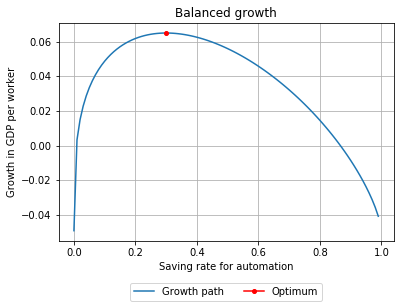

In [24]:
# Data for plotting
s_m = np.arange(-1, 80, 0.01)
g = g = 0.21*(s_m**0.3)*((1-s_m)**(1-0.3))-0.04-0.009

fig, ax = plt.subplots()
ax.plot(s_m, g, label='Growth path')
plt.plot([0.3], [0.06500510506486332], marker='o', markersize=4, color="red", label='Optimum')
ax.set(xlabel='Saving rate for automation', ylabel='Growth in GDP per worker',
       title='Balanced growth')
ax.grid()
plt.legend(bbox_to_anchor=(0.5, -0.3), loc=8, ncol=4)

plt.show()

We optimize with bisection, since we think that it provides the users and readers with a fine understanding of how the optimal value of $s_m$ is found. We suplement this, with a widget that describes the steps of the bisection method. Overall, we supply our deriviative function with two values (a & b), which we know will give the deriviative function a positive and a negative value. We thereby know that the optimum is between these to points (where $f=0$). Then we find the midpoint of these to values. If the midpoint is not equal to zero, we move our points of a & b, closer to each other. This progress repeated till the midpoint equals the root. If our function value of a & b multiplied is positive, our bisection will not work, beause our bounds are wrongly set.

In [25]:
def bisection(f,a,b,max_iter=50,tol=1e-6,full_info=True):
    """ bisection
    
    Solve equation f(x) = 0 for a <= x <= b.
    
    Args:
    
        f (function): function
        a (float): left bound
        b (float): right bound
        tol (float): tolerance on solution
        
    Returns:
    
        m (float): root
    
    """
    
    # test inputs
    if f(a)*f(b) >= 0:
        print("bisection method fails.")
        return None
    
    # step 1: initialize
    _a = a
    _b = b
    a = np.zeros(max_iter)
    b = np.zeros(max_iter)
    m = np.zeros(max_iter)
    fm = np.zeros(max_iter)
    a[0] = _a
    b[0] = _b
    
    # step 2-4: main
    i = 0
    while i < max_iter:
        
        # step 2: midpoint and associated value
        m[i] = (a[i]+b[i])/2
        fm[i] = f(m[i])
        
        # step 3: determine sub-interval
        if abs(fm[i]) < tol:
            break        
        elif f(a[i])*fm[i] < 0:
            a[i+1] = a[i]
            b[i+1] = m[i]
        elif f(b[i])*fm[i] < 0:
            a[i+1] = m[i]
            b[i+1] = b[i]
        else:
            print("bisection method fails.")
            return None
        
        i += 1
        
    if full_info == True:
        return m,i,a,b,fm
    else:
        return m[i],i

In [30]:
#We assign the values of "a" and "b" - and we know it has to be between [0,1].
m,i,a,b,fm = bisection(f,0.2,0.9) 

#Next, we print our value of our midtpoint, and the number of iterations.
#The number of iterations, is interesting becauses it shows how many loops the bisection has been through.
print(i, m[i])

17 0.2999996185302734


So with 17 iterations, we find the optimal value of $s_m$ equal to 0.3, which is in lign with our value of $\alpha$ given by Prettner. To get a better grasp of how the bisection method works, we plot a widget, which illustrate how we find our optimal point.  

In [11]:
def plot_bisection(f,a,b,xmin=0.2,xmax=0.9,xn=100):
    
    # a. find root and return all information 
    m,max_iter,a,b,fm = bisection(f,a,b,full_info=True)
    
    # b. compute function on grid
    xvec = np.linspace(xmin,xmax,xn)
    fxvec = f(xvec)
    
    # c. figure
    def _figure(i):
        
        # ii. figure
        fig = plt.figure(dpi=100)
        ax = fig.add_subplot(1,1,1)
        
        ax.plot(xvec,fxvec) # on grid
        ax.plot(m[i],fm[i],'o',color='black',label='current') # mid
        ax.plot([a[i],b[i]],[fm[i],fm[i]],'--',color='black',label='range') # range
        ax.axvline(a[i],ls='--',color='black')
        ax.axvline(b[i],ls='--',color='black')        
        
        ax.legend(loc='lower right')
        ax.grid(True)
        ax.set_ylim([fxvec[-1],fxvec[0]])
    
    widgets.interact(_figure,
        i=widgets.IntSlider(description="iterations", min=0, max=max_iter, step=1, value=0)
    ); 

plot_bisection(f,0.2,0.9) #The command gives a figure which is interactive manually. 

interactive(children=(IntSlider(value=0, description='iterations', max=17), Output()), _dom_classes=('widget-i…

We also think it could be fun to make a figure, which moves automatically without scrolling on the interactive bar. We therefore rewrite the code, so it just plots data of one number of iterations. 

In [12]:
#transformerer widget om til plot for at kunne loope de forskellige plots (med stigende i (itereationer))
def plot_bi(f,a,b,i,xmin=0.2,xmax=0.9,xn=100):
    
    # a. find root and return all information 
    m,max_iter,a,b,fm = bisection(f,a,b,full_info=True)
    
    # b. compute function on grid
    xvec = np.linspace(xmin,xmax,xn)
    fxvec = f(xvec)
    
    # c. figure
    def _figure(i):
        
        # ii. figure
        # fig = plt.figure(dpi=100)
        # ax = fig.add_subplot(1,1,1)
        fig, ax = plt.subplots(ncols=1, sharey=False)
        
        ax.plot(xvec,fxvec) # on grid
        ax.plot(m[i],fm[i],'o',color='black',label='current') # mid
        ax.plot([a[i],b[i]],[fm[i],fm[i]],'--',color='black',label='range') # range
        ax.axvline(a[i],ls='--',color='black')
        ax.axvline(b[i],ls='--',color='black')        
        
        ax.legend(loc='lower right')
        ax.grid(True)
        ax.set_ylim([fxvec[-1],fxvec[0]])
        plt.show()
        return
    
    fig = _figure(i)
    
    return fig

plot_bi(f,0.2,0.9, 2) # The function makes it possible to choose which iterations to plot



Hereafter, we make a loop over the display of increasing numbers of iterations - and we make sure too clear the present output. In this way, it looks automatic.

In [31]:
#loop set too 1 second
def loop():
    for i in range(0,9,1):
            display.display(plot_bi(f,a[i],b[i],i,xmin=0.2,xmax=0.9,xn=100))
            display.clear_output(wait=True);
            time.sleep(1)
loop()


None

We have now found the optimal parameter value of $s_m$, both by analytically(sympy) and via numerical optimization. 

## Conclusion: Using our results to plot the accumulation

We will now show how the optimal parameter value of $s_m$ express itself in the accumulation of capital and the respective growth rates.
For doing so, we use the following parameter values shown in table 1, which is taken from the paper of Klaus Prettner.
The table summarizes the parameter values we will use for our numerical analysis and provides a valuation of them.

\\[Table \ 1: Parameter \ values\\]

| Parameter | Value |                                                Comment |
|-----------|:-----:|-------------------------------------------------------:|
| s         |  0.21 |   Average gross investment rate (2000-2013) for the US |
| $s_m$       |  0.2, 0.3, 0.4  |                                        Arbitrary value |
| $\alpha$    |  1/3  | Jones (1995), Acemoglu (2009), Grossmann et al. (2013) |
| $\delta$    | 0.04  | Grossmann et al. (2013)                                |
| n         | 0.009 | Average rate (2000-2014) for the US (World Bank, 2015) |

 **Plotting the accumulation:**
 

0.06116475132918917
0.06116526434727496


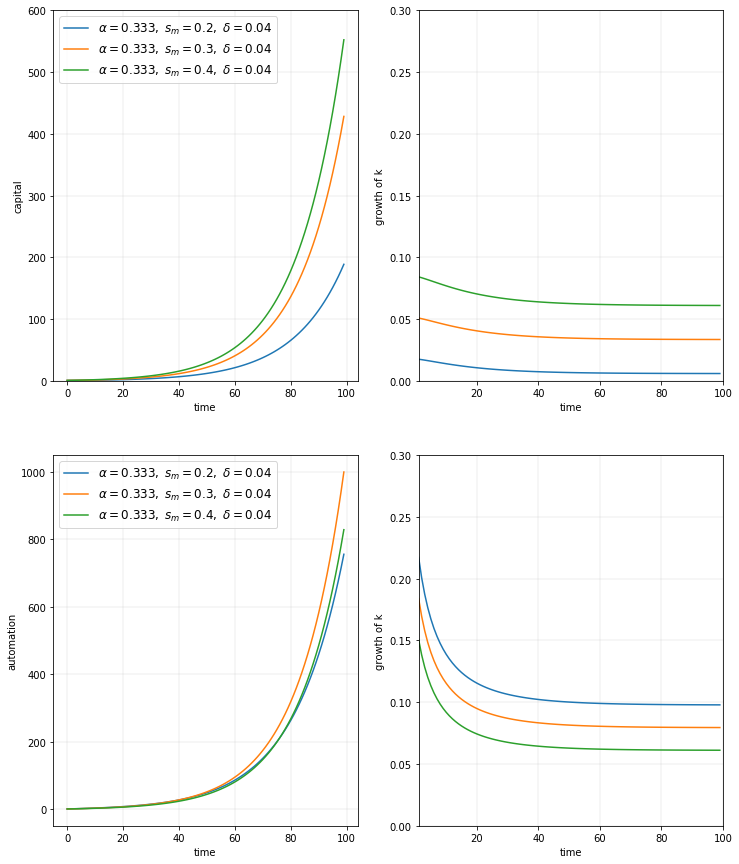

In [15]:
# Our model

# Allocate memory for time series
series_length=100

k = np.empty(series_length)
p = np.empty(series_length)
g_k = np.empty(series_length)
g_p = np.empty(series_length)

fig, axes = plt.subplots(2, 2, figsize=(12, 15))

# Trajectories with different s_m
alpha = 1/3
delta = 0.04
s = 0.21
#s = (0.21, 0.25) # Would generate the same figures as Klaus Prettner fig. 1. b
s_m = (0.2, 0.3, 0.4)
n = 0.009

for j in range(3):
    k[0] = 1
    p[0] = 1
    
    for t in range(series_length-1):
        k[t+1] = s_m[j] * s * (1 + p[t])**(1 - alpha) * k[t]**(alpha) + (1- delta) * k[t] - n * k[t] 
        p[t+1] = (1-s_m[j]) * s * (1 + p[t])**(1 - alpha) * k[t]**(alpha) + (1- delta) * p[t] - n * p[t]
        #k[t+1] = s_m * s[j] * (1 + p[t])**(1 - alpha) * k[t]**(alpha) +(1- delta) * k[t] - n * k[t]       #Klaus Prettner-Copy
        #p[t+1] = (1-s_m) * s[j] * (1 + p[t])**(1 - alpha) * k[t]**(alpha) + (1- delta) * p[t] - n * p[t]  #Klaus Prettner-Copy
    axes[0,0].plot(k, '-', label=rf"$\alpha = {alpha:.3f},\; s_m = {s_m[j]},\; \delta={delta}$")
    axes[1,0].plot(p, '-', label=rf"$\alpha = {alpha:.3f},\; s_m = {s_m[j]},\; \delta={delta}$")

for j in range(3):
    
    for t in range(series_length-1):
        g_k[t+1] = s_m[j] * s * ((1+p[t])/(k[t]))**(1-alpha) - delta - n
        g_p[t+1] = (1-s_m[j]) * s * ((1+p[t])/p[t])**(1-alpha) *  (k[t]/p[t])**alpha - delta - n
        #g_k[t+1] = s_m * s[j] * ((1+p[t])/(k[t]))**(1-alpha) - delta - n                                  #Klaus Prettner-Copy
        #g_p[t+1] = (1-s_m) * s[j] * ((1+p[t])/p[t])**(1-alpha) *  (k[t]/p[t])**alpha - delta - n          #Klaus Prettner-Copy
    axes[0,1].plot(g_k, '-', label=rf"$\alpha = {alpha:.3f},\; s_m = {s_m[j]},\; \delta={delta}$")
    axes[1,1].plot(g_p, '-', label=rf"$\alpha = {alpha:.3f},\; s_m = {s_m[j]},\; \delta={delta}$")
    
axes[0,0].grid(lw=0.2)
axes[1,0].grid(lw=0.2)
axes[0,1].grid(lw=0.2)
axes[1,1].grid(lw=0.2)

#ajust limmit on the y and x axis. 
axes[0,0].set_ylim(0, 600)
axes[0,1].set_xlim(1,series_length)
axes[1,1].set_xlim(1,series_length)
axes[0,1].set_ylim(0.0,0.3)
axes[1,1].set_ylim(0.0,0.3)

axes[0,0].set_xlabel('time')
axes[0,0].set_ylabel('capital')
axes[1,0].set_xlabel('time')
axes[1,0].set_ylabel('automation')
axes[0,1].set_xlabel('time')
axes[0,1].set_ylabel('growth of k')
axes[1,1].set_xlabel('time')
axes[1,1].set_ylabel('growth of k')

axes[0,0].legend(loc='upper left', frameon=True, fontsize=12)
axes[1,0].legend(loc='upper left', frameon=True, fontsize=12)
print(g_k[99])
print(g_p[99])

We observe, that the different values of $s_m$, gives a trade-off problem. Looking at the upper-graphs, we see that the function with $s_m=0.4$ will accumulate the biggest amount of capital. The reason is simple, since it is the function with the biggest investment-share in capital. We also observe that all three examples converge to a constant growth-rate. 

Looking at the lower graphs, the opposite is the situation, since we observe automation capital - that is the case, when we see the growth rates, but not the accumultation. The biggest investmentshare in automation, does not give the largest accumulation. The reason is simple; automation requires investments in "normal" capital, otherwise it is useless. The growth in automation, will be affected negatively, if we end up in a situation, where there is more automation capital than normal capital (see the growth rate equation above).
Our result of $s_m=0.3$, can be viewed as the compromise (or share) between investments in automation and capital. 

## Appendix

First we divide $\dot k(t)$ and $\dot p(t)$ by k(t) and p(t), respectively. $g_x$ denote the growth rate of k and p respectively. 

(1) \\[ g_k = \frac {\dot k(t)}{k(t)} = s_ms\bigg[\frac{1+p(t)}{k(t)}\bigg]^{1-\alpha}-\delta-n\\]


(2) \\[      g_p=\frac{\dot p(t)}{p(t)} =(1-s_m)s\bigg[\frac{1+p(t)}{p(t)}\bigg]^{1-\alpha}\bigg[\frac{k(t)}{p(t)}\bigg]-\delta-n \\]


We then calculate the growth rate of its growth rate denoted by $g_{g_x}$:

\\[
    log(g_k+\delta+n)=log(s_m)+log(s)+(1-\alpha)log[1+p(t)]-(1-\alpha)log[k(t)] \\
    log(g_p+\delta+n)=log(1-s_m)+log(s)+(1-\alpha)log[1+p(t)]-(1-\alpha)log[p(t)]+\alpha log[k(t)]-\alpha log[p(t)] \\ 
\\]

\\[g_{({g_k}+\delta+n)}=\frac{\partial log(g_k)}{\partial t}=(1-\alpha)\frac{\dot p(t)}{1+p(t)}-(1-\alpha)g_k\\]

\\[g_{({g_p}+\delta+n)}=\frac{\partial log(g_p)}{\partial t}= (1-\alpha)\frac{\dot p(t)}{1+p(t)}-(1-\alpha)g_p+\alpha g_k-\alpha g_p\\]

We then impose constant growth along the balanced growth path, which does that we can equalize $g_{({g_k}+\delta+n)}$ and $g_{({g_p}+\delta+n)}$. By doing soo, it is *easily* seeing by reducing the equation, that $g_k=g_p$. This imply that the economy converges to a long-run growth rate with $g_p ≈ g_k ≡ g$

Note that, for large $p(t)$ and large $k(t)$, we have:
\\[ (\frac{1+p(t)}{p(t)} )^{1-\alpha} ≈ 1, \quad and \quad \frac{p(t)}{k(t)}≈\frac{1+p(t)}{k(t)}:=C\\]

With the following approximations is equation (1) and (2), respectively the growth rate of $k$ and $p$ rewritten as: 

(1.a) \\[g = s_m s C^{1-\alpha}-\delta-n \\]
(2.a) \\[g = (1-s_m) s [\frac{1}{C}]^\alpha-\delta-n \\]


## Reference 


Prettner, K. (2019). A NOTE ON THE IMPLICATIONS OF AUTOMATION FOR ECONOMIC GROWTH AND THE LABOR SHARE. Macroeconomic Dynamics, 23(3), 1294-1301. doi:10.1017/S1365100517000098

## Graphs of Klaus Prettner

To be sure that our results were correct, we have reproduced his graphs with our python code.

0.05075236831794756
0.0507506494166125


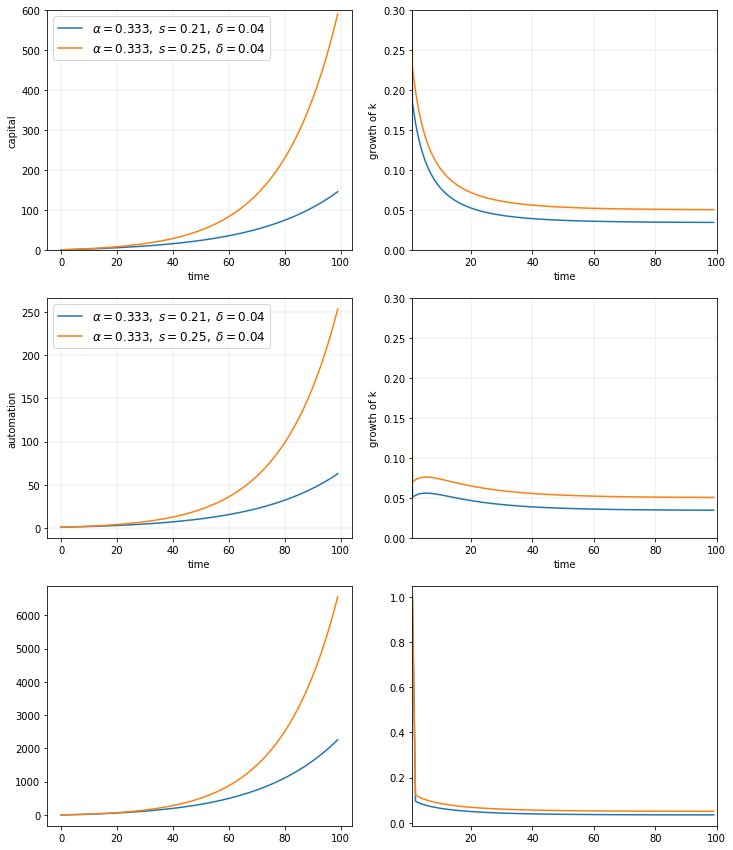

In [65]:
#Extra code - Copy of Klaus Prettner's graphs turned into python code.

# Allocate memory for time series
series_length=100

k = np.empty(series_length)
p = np.empty(series_length)
y = np.empty(series_length)
g_k = np.empty(series_length)
g_p = np.empty(series_length)
g_y = np.empty(series_length)

fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Trajectories with different s_m
alpha = 1/3
delta = 0.04
s = (0.21, 0.25)
s_m = 0.7
#s_m = (0.3, 0.7, 0.9)
n = 0.009

for j in range(2):
    k[0] = 1
    p[0] = 1
    y[0] = 1
    
    for t in range(series_length-1):
        #k[t+1] = s_m[j] * s * (1 + p[t])**(1 - alpha) * k[t]**(alpha) - delta * k[t] - n * k[t]+k[t] #Plot til forskellige s_m-værdier
        k[t+1] = s_m * s[j] * (1 + p[t])**(1 - alpha) * k[t]**(alpha) +(1- delta) * k[t] - n * k[t]
        p[t+1] = (1-s_m) * s[j] * (1 + p[t])**(1 - alpha) * k[t]**(alpha) + (1- delta) * p[t] - n * p[t]
        y[t+1] = (1+p[t])**(1-alpha)*k[t]**alpha+y[t]
    axes[0,0].plot(k, '-', label=rf"$\alpha = {alpha:.3f},\; s = {s[j]},\; \delta={delta}$")
    axes[1,0].plot(p, '-', label=rf"$\alpha = {alpha:.3f},\; s = {s[j]},\; \delta={delta}$")
    axes[2,0].plot(y, '-', label=rf"$\alpha = {alpha:.3f},\; s = {s[j]},\; \delta={delta}$")

for j in range(2):
    g_k[0] = 1 
    g_p[0] = 1
    g_y[0] = 1
    for t in range(series_length-1):
        g_k[t+1] = s_m * s[j] * ((1+p[t])/(k[t]))**(1-alpha) - delta - n
        g_p[t+1] = (1-s_m) * s[j] * ((1+p[t])/p[t])**(1-alpha) *  (k[t]/p[t])**alpha - delta - n
        g_y[t+1] = (1-alpha)*g_p[t]+alpha*g_k[t]
    axes[0,1].plot(g_k, '-', label=rf"$\alpha = {alpha:.3f},\; s = {s[j]},\; \delta={delta}$")
    axes[1,1].plot(g_p, '-', label=rf"$\alpha = {alpha:.3f},\; s = {s[j]},\; \delta={delta}$")
    axes[2,1].plot(g_y, '-', label=rf"$\alpha = {alpha:.3f},\; s = {s[j]},\; \delta={delta}$")
    
axes[0,0].grid(lw=0.2)
axes[1,0].grid(lw=0.2)
axes[0,1].grid(lw=0.2)
axes[1,1].grid(lw=0.2)

#ajust limmit on the y and x axis. 
axes[0,0].set_ylim(0, 600)
axes[0,1].set_xlim(1,series_length)
axes[1,1].set_xlim(1,series_length)
axes[2,1].set_xlim(1,series_length)
axes[0,1].set_ylim(0.0,0.3)
axes[1,1].set_ylim(0.0,0.3)

axes[0,0].set_xlabel('time')
axes[0,0].set_ylabel('capital')
axes[1,0].set_xlabel('time')
axes[1,0].set_ylabel('automation')
axes[0,1].set_xlabel('time')
axes[0,1].set_ylabel('growth of k')
axes[1,1].set_xlabel('time')
axes[1,1].set_ylabel('growth of k')

axes[0,0].legend(loc='upper left', frameon=True, fontsize=12)
axes[1,0].legend(loc='upper left', frameon=True, fontsize=12)
print(g_k[99])
print(g_p[99])